<a href="https://colab.research.google.com/github/medamer/Built-week-1/blob/master/Build_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electricity And Air Pollution

My project is about the electricity production using diffrent sources. I splited the sources to two categories, clean and no clean. Clean sources are Hydroelectric Conventional, Nuclear, Pumped Storage, Solar, and Wind. The clean sources are fossil fuels and materials that come from plants, municipal and industrial wastes.

The source of the datatset used is US Energy Information Administration www.eia.gov

#1.1-Import and cleand the data:
   - Import the data.
   - Add new column headers.
   - Explore the data using describe function.

In [0]:
#Import all the libraries I'll need:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Uploading the 1st file from the local machine:
from google.colab import files
uploaded = files.upload()

Saving Elec gen emission.xls to Elec gen emission.xls


In [0]:
# Uploading the datasset Excel file and adding columns header:
import io
column_header = ['year', 'state', 'energy_source', 'CO2(Tons)',	'SO2(Tons)',	'NOx(Tons)']
df1 = pd.read_excel(io.BytesIO(uploaded['Elec gen emission.xls']), names = column_header)

In [0]:
# Make a copie of the original file and check our dataset:
emission = df1.copy()
emission.head()

,year,state,energy_source,CO2(Tons),SO2(Tons),NOx(Tons)
0,1990,AK,All Sources,8417618,37482,25124
1,1990,AK,Coal,2936718,28046,11780
2,1990,AK,Natural Gas,4805316,22,11076
3,1990,AK,Other,0,1968,458
4,1990,AK,Petroleum,675584,7445,1808


In [0]:
# Uploading the 2nd file from the local machine:
uploaded2 = files.upload()

Saving electricity by state.xls to electricity by state.xls


In [0]:
# Uploading the datasset Excel file and adding columns header:
column_header2 = ['year', 'state', 'energy_source','non_clean_source','clean_source', 'generation (MWH)']
df2 = pd.read_excel(io.BytesIO(uploaded2['electricity by state.xls']), names = column_header2)

In [0]:
# Make a copie of the original file and check our dataset:
elec = df2.copy()
elec.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH)
0,1990,AK,Coal,1021146.0,0.0,1021146.0
1,1990,AK,Hydroelectric Conventional,0.0,1949042.0,1949042.0
2,1990,AK,Natural Gas,6932522.0,0.0,6932522.0
3,1990,AK,Petroleum,994232.0,0.0,994232.0
4,1990,AK,Total,0.0,11199012.0,11199012.0


In [0]:
# Check the description:
elec.describe()

,year,non_clean_source,clean_source,generation (MWH)
count,13812.000000,1.381200e+04,1.381200e+04,1.381200e+04
mean,2004.741384,1.130030e+07,2.045234e+07,3.175264e+07
std,8.371057,3.779178e+07,6.581736e+07,7.278650e+07
min,1990.000000,-9.686600e+04,-4.480154e+06,-4.480154e+06
25%,1998.000000,0.000000e+00,0.000000e+00,1.988110e+05
50%,2005.000000,7.747800e+04,0.000000e+00,2.306989e+06
75%,2012.000000,2.128218e+06,2.540094e+06,2.411787e+07
max,2018.000000,4.794262e+08,9.547048e+08,9.547048e+08


In [0]:
# Check the description:
emission.describe()

,year,CO2(Tons),SO2(Tons),NOx(Tons)
count,9414.000000,9.414000e+03,9.414000e+03,9.414000e+03
mean,2004.674634,2.750423e+07,1.132690e+05,5.558989e+04
std,8.104061,5.732649e+07,3.363518e+05,1.308351e+05
min,1990.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1998.000000,0.000000e+00,2.200000e+01,7.820000e+02
50%,2005.000000,1.132304e+06,1.008000e+03,4.797000e+03
75%,2012.000000,2.372959e+07,4.706350e+04,3.543450e+04
max,2018.000000,5.349282e+08,4.091966e+06,1.384336e+06


#1.2- Data wrangling:
  - Add columns.
  - Remove the sub-totals from both datasets.
  - Check the shape.
  - Join the two datasets using the function merge.
  - Check for missing value and replace them with zeros.

In [0]:
# Combine all types of emissions in one column, without dropping the originals:
emission['emissions'] = emission['CO2(Tons)']+emission['SO2(Tons)']+emission['NOx(Tons)']
emission.head()

,year,state,energy_source,CO2(Tons),SO2(Tons),NOx(Tons),emissions
0,1990,AK,All Sources,8417618,37482,25124,8480224
1,1990,AK,Coal,2936718,28046,11780,2976544
2,1990,AK,Natural Gas,4805316,22,11076,4816414
3,1990,AK,Other,0,1968,458,2426
4,1990,AK,Petroleum,675584,7445,1808,684837


In [0]:
# Remove the rows containig sub-totals:
emission = emission[~emission.energy_source.str.contains('All Sources')]
emission.head()

,year,state,energy_source,CO2(Tons),SO2(Tons),NOx(Tons),emissions
1,1990,AK,Coal,2936718,28046,11780,2976544
2,1990,AK,Natural Gas,4805316,22,11076,4816414
3,1990,AK,Other,0,1968,458,2426
4,1990,AK,Petroleum,675584,7445,1808,684837
6,1990,AL,Coal,103158948,970457,420795,104550200


In [0]:
# Remove the rows containig sub-totals:
elec = elec[~elec.energy_source.str.contains('Total')]
elec.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH)
0,1990,AK,Coal,1021146.0,0.0,1021146.0
1,1990,AK,Hydroelectric Conventional,0.0,1949042.0,1949042.0
2,1990,AK,Natural Gas,6932522.0,0.0,6932522.0
3,1990,AK,Petroleum,994232.0,0.0,994232.0
5,1990,AK,Wind,0.0,0.0,0.0


In [0]:
# Check the shape of our dataset:
emission.shape

(7935, 7)

In [0]:
# Check the shape of our dataset:
elec.shape

(12333, 6)

In [0]:
# Join the 2 datasets using the function merge:
elec_emissions = pd.merge(elec, emission, how = 'outer', on = ['year', 'state', 'energy_source'])
elec_emissions.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH),CO2(Tons),SO2(Tons),NOx(Tons),emissions
0,1990,AK,Coal,1021146.0,0.0,1021146.0,2936718.0,28046.0,11780.0,2976544.0
1,1990,AK,Hydroelectric Conventional,0.0,1949042.0,1949042.0,NaN,NaN,NaN,NaN
2,1990,AK,Natural Gas,6932522.0,0.0,6932522.0,4805316.0,22.0,11076.0,4816414.0
3,1990,AK,Petroleum,994232.0,0.0,994232.0,675584.0,7445.0,1808.0,684837.0
4,1990,AK,Wind,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Above I choose "outer" to keep all the rows, because the rows with 0 emissions would be deleted, and they are important to keep

In [0]:
# Check for null values, because the clean sources like wind or solar don't produce emissions:
elec_emissions.isnull().sum()

year                   0
state                  0
energy_source          0
non_clean_source     301
clean_source         301
generation (MWH)     301
CO2(Tons)           4696
SO2(Tons)           4696
NOx(Tons)           4696
emissions           4696
dtype: int64

In [0]:
# Check the shape of our new dataset:
elec_emissions.shape

(12634, 10)

In [0]:
# Replace the NaN with zeros:
elec_emissions = elec_emissions.fillna(0)

In [0]:
# Check if there are any more NaNs left:
elec_emissions.isnull().sum()

year                0
state               0
energy_source       0
non_clean_source    0
clean_source        0
generation (MWH)    0
CO2(Tons)           0
SO2(Tons)           0
NOx(Tons)           0
emissions           0
dtype: int64

In [0]:
# Check our dataset:
elec_emissions.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH),CO2(Tons),SO2(Tons),NOx(Tons),emissions
0,1990,AK,Coal,1021146.0,0.0,1021146.0,2936718.0,28046.0,11780.0,2976544.0
1,1990,AK,Hydroelectric Conventional,0.0,1949042.0,1949042.0,0.0,0.0,0.0,0.0
2,1990,AK,Natural Gas,6932522.0,0.0,6932522.0,4805316.0,22.0,11076.0,4816414.0
3,1990,AK,Petroleum,994232.0,0.0,994232.0,675584.0,7445.0,1808.0,684837.0
4,1990,AK,Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0


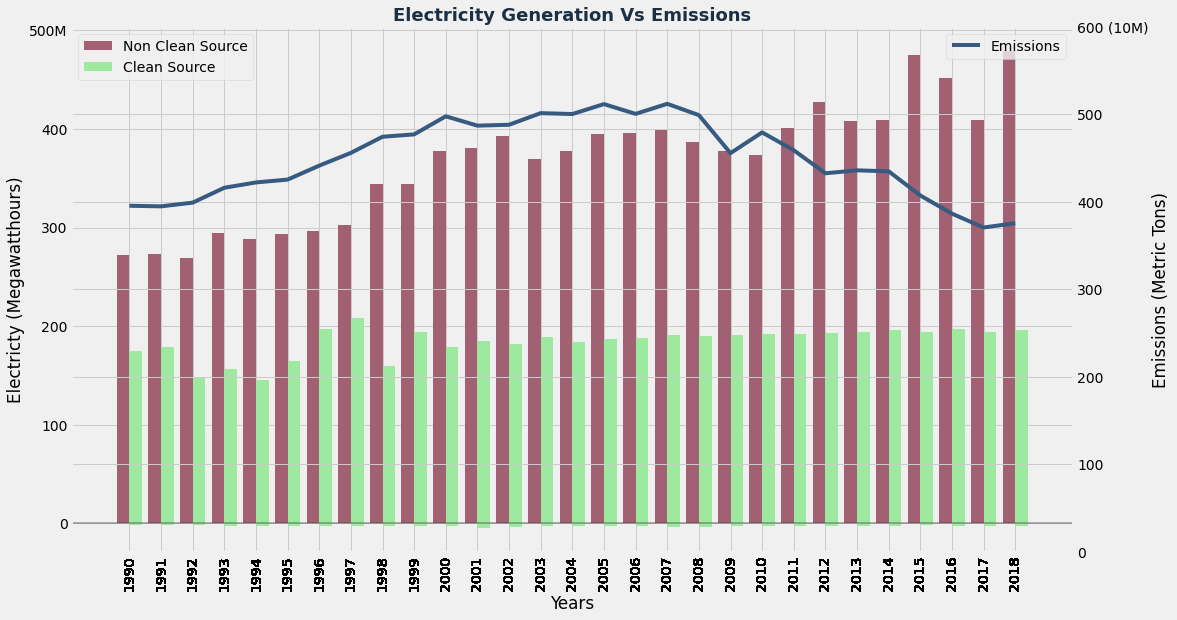

In [0]:
#Visualization 1:

labels = elec_emissions['year']
non_clean = elec_emissions['non_clean_source']/10**6
clean = elec_emissions['clean_source']/10**6

x = elec_emissions['year']  # the label locations
width = 0.40  # the width of the bars

#Plot the X and Ys:
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(x-width/2, non_clean, width, label='Non Clean Source',color='#a16172')
ax.bar(x+width/2, clean, width, label='Clean Source',color='#9ee9a0')

# Add some text for labels, and custom x-axis and y-axis tick labels, etc.
ax.set_ylabel('Electricty (Megawatthours)')
ax.set_yticks(range(0,600,100))
ax.set_yticklabels([0,100,200,300,400,'500M'])
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_xlabel('Years')

# Sum the emissions by years:
derp = elec_emissions.groupby('year')['emissions'].sum().to_dict()
derp_x = [i for i in derp.keys()]
derp_y = [i/10**7 for i in derp.values()]

# Add a scond y-axis, plot the line, and add labels:
ax2 = ax.twinx()
ax2.plot(derp_x, derp_y, linestyle='-', label='Emissions',color='#365a80')
ax2.set_yticks(range(0,700,100))
ax2.set_yticklabels([0,100,200,300,400,500,'600 (10M)'])
ax2.set_ylabel('Emissions (Metric Tons)')

# Add title:
ax.set_title('Electricity Generation Vs Emissions', fontsize= 18, fontweight='bold',color='#1a2f43')
ax.legend()
ax2.legend(loc='upper right')
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)


plt.show()

In [0]:
# Sum the column emission by states:
derp2 = elec_emissions.groupby('state')['emissions'].sum().to_dict()
derp_x2 = [i for i in derp2.keys()]
derp_y2 = [i/10**7 for i in derp2.values()]
state = pd.Series(derp_x2)
emiss = pd.Series(derp_y2)

#Make a new datafeame to use for the graph:
df = pd.concat([state, emiss], axis=1)
df = df.rename(columns={0:'state', 1:'emissions'})
df.tail()

,state,emissions
47,VT,0.155326
48,WA,69.850921
49,WI,267.461451
50,WV,444.233470
51,WY,271.602799


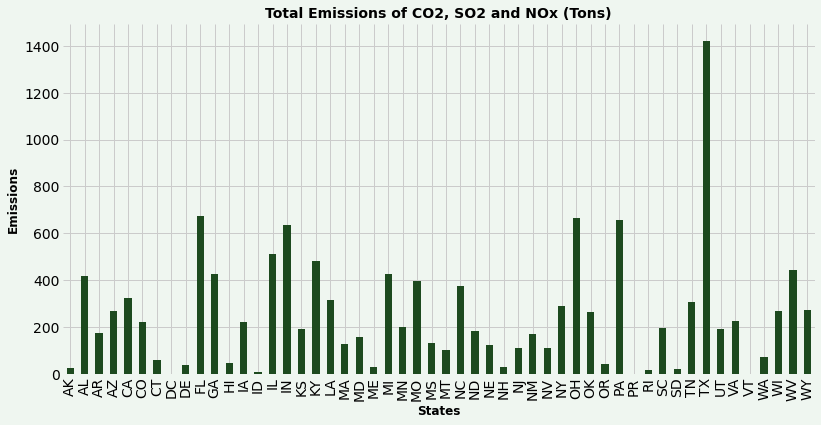

In [0]:
#Visualization 2:

plt.style.use('fivethirtyeight')

# Make figure, X axis and Y axis:
fig, ax = plt.subplots(figsize=(12,6))
fig.set_facecolor('#eff6f0')
ax.set_facecolor('#eff6f0')
df.plot(kind='bar', y= 'emissions', x= 'state',color='#1d4a1f' ,ax=ax)

#Add labels for X and Y axis:
ax.set_xlabel('States', fontsize=12, fontweight='bold')
ax.set_ylabel('Emissions', fontsize=12, fontweight='bold')

# Add the title:
ax.set_title("Total Emissions of CO2, SO2 and NOx (Tons)", fontsize=14, fontweight='bold')

ax.legend().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [0]:
# Assign Texas dataset for Texas state.
texas = elec_emissions[elec_emissions['state']=='TX']
texas.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH),CO2(Tons),SO2(Tons),NOx(Tons),emissions
304,1990,TX,Coal,241842792.0,0.0,241842792.0,253137640.0,968965.0,942927.0,255049532.0
305,1990,TX,Hydroelectric Conventional,0.0,3587250.0,3587250.0,0.0,0.0,0.0,0.0
306,1990,TX,Natural Gas,272468650.0,0.0,272468650.0,167774260.0,811.0,361139.0,168136210.0
307,1990,TX,Nuclear,0.0,31718516.0,31718516.0,0.0,0.0,0.0,0.0
308,1990,TX,Other,977462.0,0.0,977462.0,9562.0,19387.0,12658.0,41607.0


#2- Visualisations:

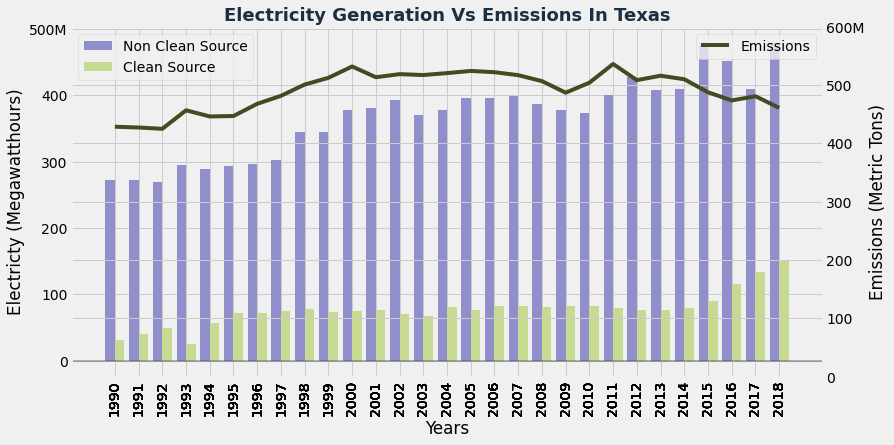

In [0]:
#Visualization 3:

labels_tx = texas['year']
non_clean_tx = texas['non_clean_source']/10**6
clean_tx = texas['clean_source']/10**6

x = texas['year']  # the label locations
width = 0.40  # the width of the bars

#Plot the X and Ys:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x-width/2, non_clean_tx, width, label='Non Clean Source',color='#908fcc')
ax.bar(x+width/2, clean_tx, width, label='Clean Source',color='#c7da91')

# Add some text for labels, and custom x-axis and y-axis tick labels, etc.
ax.set_ylabel('Electricty (Megawatthours)')
ax.set_yticks(range(0,600,100))
ax.set_yticklabels([0,100,200,300,400,'500M'])
ax.set_xticks(x)
ax.set_xticklabels(labels_tx, rotation='vertical')
ax.set_xlabel('Years')

# Sum the emissions by years:
derp_tx = texas.groupby('year')['emissions'].sum().to_dict()
derp_x3 = [i for i in derp_tx.keys()]
derp_y3 = [i/10**6 for i in derp_tx.values()]

# Add a scond y-axis, plot the line, and add labels:
ax2 = ax.twinx()
ax2.plot(derp_x3, derp_y3, linestyle='-', label='Emissions',color='#414c20')
ax2.set_yticks(range(0,700,100))
ax2.set_yticklabels([0,100,200,300,400,500,'600M'])
ax2.set_ylabel('Emissions (Metric Tons)')

# Add title:
ax.set_title('Electricity Generation Vs Emissions In Texas', fontsize= 18, fontweight='bold',color='#1a2f43')
ax.legend()
ax2.legend(loc='upper right')
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)


plt.show()

In [0]:
# Make a dataset for Texas for the year 2018, and check all the sources used for electricity production:
tx_18 = texas[texas['year']==2018]
tx_18 = tx_18.drop(['non_clean_source', 'clean_source','CO2(Tons)', 'SO2(Tons)', 'NOx(Tons)', 'emissions'], axis=1)
tx_18['generation (MWH)'] = tx_18['generation (MWH)']/10**6
tx_18.head()

,year,state,energy_source,generation (MWH)
12257,2018,TX,Coal,223.445285
12258,2018,TX,Hydroelectric Conventional,2.252756
12259,2018,TX,Natural Gas,479.426169
12260,2018,TX,Nuclear,82.371478
12261,2018,TX,Other,0.905258


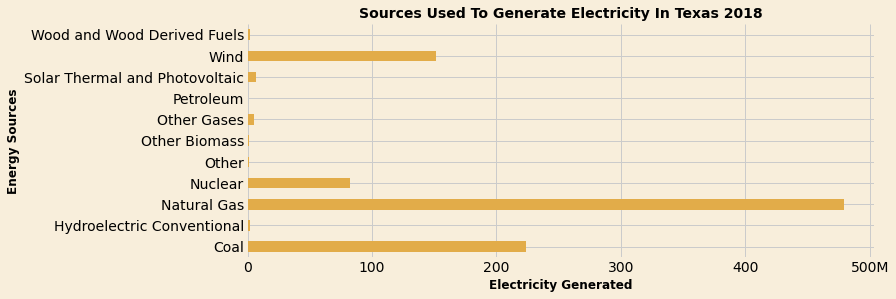

In [0]:
#Visualization 4:

plt.style.use('fivethirtyeight')

# Make figure, X axis and Y axis:
fig, ax = plt.subplots(figsize=(10,4))
fig.set_facecolor('#f8eedb')
ax.set_facecolor('#f8eedb')
tx_18.plot(kind='barh', y= 'generation (MWH)', x= 'energy_source',color='#e2ac49' ,ax=ax)

#Add labels for X and Y axis:
ax.set_xlabel('Electricity Generated', fontsize=12, fontweight='bold')
ax.set_xticks(range(0,600,100))
ax.set_xticklabels([0,100,200,300,400,'500M'])
ax.set_ylabel('Energy Sources', fontsize=12, fontweight='bold')

# Add the title:
ax.set_title("Sources Used To Generate Electricity In Texas 2018", fontsize=14, fontweight='bold')

ax.legend().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [0]:
#Since Texas is secound polulated state, let compare it with the first populated state which is California:

cali = elec_emissions[elec_emissions['state']=='CA']
cali.head()

,year,state,energy_source,non_clean_source,clean_source,generation (MWH),CO2(Tons),SO2(Tons),NOx(Tons),emissions
29,1990,CA,Coal,5275354.0,0.0,5275354.0,7709620.0,63726.0,32146.0,7805492.0
30,1990,CA,Geothermal,29042508.0,0.0,29042508.0,721338.0,0.0,0.0,721338.0
31,1990,CA,Hydroelectric Conventional,0.0,47585134.0,47585134.0,0.0,0.0,0.0,0.0
32,1990,CA,Natural Gas,148336616.0,0.0,148336616.0,85786660.0,412.0,182489.0,85969561.0
33,1990,CA,Nuclear,0.0,65385614.0,65385614.0,0.0,0.0,0.0,0.0


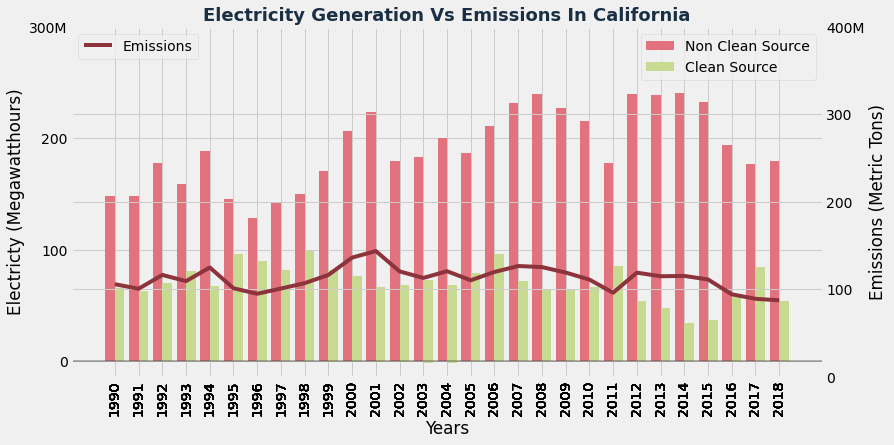

In [0]:
#Visualization 5:

labels_ca = cali['year']
non_clean_ca = cali['non_clean_source']/10**6
clean_ca = cali['clean_source']/10**6

x = cali['year']  # the label locations
width = 0.40  # the width of the bars

#Plot the X and Ys:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x-width/2, non_clean_ca, width, label='Non Clean Source',color='#e2737e')
ax.bar(x+width/2, clean_ca, width, label='Clean Source',color='#c7da91')

# Add some text for labels, and custom x-axis and y-axis tick labels, etc.
ax.set_ylabel('Electricty (Megawatthours)')
ax.set_yticks(range(0,400,100))
ax.set_yticklabels([0,100,200,'300M'])
ax.set_xticks(x)
ax.set_xticklabels(labels_ca, rotation='vertical')
ax.set_xlabel('Years')

# Sum the emissions by years:
derp_ca = cali.groupby('year')['emissions'].sum().to_dict()
derp_x4 = [i for i in derp_ca.keys()]
derp_y4 = [i/10**6 for i in derp_ca.values()]

# Add a scond y-axis, plot the line, and add labels:
ax2 = ax.twinx()
ax2.plot(derp_x4, derp_y4, linestyle='-', label='Emissions',color='#8d333c')
ax2.set_yticks(range(0,500,100))
ax2.set_yticklabels([0,100,200,300,'400M'])
ax2.set_ylabel('Emissions (Metric Tons)')

# Add title:
ax.set_title('Electricity Generation Vs Emissions In California', fontsize= 18, fontweight='bold',color='#1a2f43')
ax.legend()
ax2.legend(loc='upper left')
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)


plt.show()

In [0]:
#Check all the sources used to generate electricity in California:
ca_18 = cali[cali['year']==2018]
ca_18 = ca_18.drop(['non_clean_source', 'clean_source','CO2(Tons)', 'SO2(Tons)', 'NOx(Tons)', 'emissions'], axis=1)
ca_18['generation (MWH)'] = ca_18['generation (MWH)']/10**6
ca_18.head()

,year,state,energy_source,generation (MWH)
11875,2018,CA,Coal,0.562656
11876,2018,CA,Geothermal,23.353682
11877,2018,CA,Hydroelectric Conventional,52.661333
11878,2018,CA,Natural Gas,179.208948
11879,2018,CA,Nuclear,36.427038


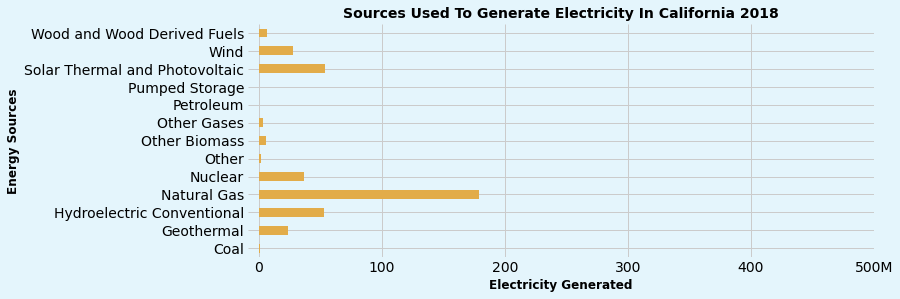

In [0]:
#Visualization 6:

plt.style.use('fivethirtyeight')

# Make figure, X axis and Y axis:
fig, ax = plt.subplots(figsize=(10,4))
fig.set_facecolor('#e4f5fc')
ax.set_facecolor('#e4f5fc')
ca_18.plot(kind='barh', y= 'generation (MWH)', x= 'energy_source',color='#e2ac49' ,ax=ax)

#Add labels for X and Y axis:
ax.set_xlabel('Electricity Generated', fontsize=12, fontweight='bold')
ax.set_xticks(range(0,600,100))
ax.set_xticklabels([0,100,200,300,400,'500M'])
ax.set_ylabel('Energy Sources', fontsize=12, fontweight='bold')

# Add the title:
ax.set_title("Sources Used To Generate Electricity In California 2018", fontsize=14, fontweight='bold')

ax.legend().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [0]:
texas_em = texas.drop(['energy_source', 'non_clean_source', 'clean_source', 'generation (MWH)', 'CO2(Tons)', 'SO2(Tons)', 'NOx(Tons)'], axis=1)
cali_em = cali.drop(['energy_source', 'non_clean_source', 'clean_source', 'generation (MWH)', 'CO2(Tons)', 'SO2(Tons)', 'NOx(Tons)'], axis=1)
texas_em = texas_em.groupby(["year", "state"], as_index=False)["emissions"].sum()
cali_em = cali_em.groupby(["year", "state"], as_index=False)["emissions"].sum()

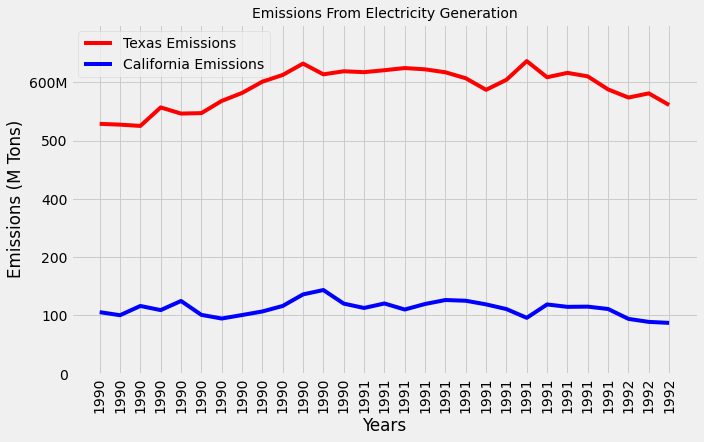

In [0]:
#Visualization:

labels_ = texas_em['year']
y1 = texas_em['emissions']/10**6
y2 = cali_em['emissions']/10**6
x = texas_em['year']  # the label locations

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x, y1, color='r', ax=ax)
sns.lineplot(x, y2, color='b', ax=ax)

# Add some text for labels, and custom x-axis and y-axis tick labels, etc.
ax.set_ylabel('Emissions (M Tons)')
ax.set_yticks(range(0,700,100))
ax.set_yticklabels([0,100,200,400,500,'600M'])
ax.set_xticks(x)
ax.set_xticklabels(labels_ca, rotation='vertical')
ax.set_xlabel('Years')
ax.set_title('Emissions From Electricity Generation', fontsize=14)


ax.legend(['Texas Emissions', 'California Emissions'])
plt.show()